# Assignment 1 Data Visualization

Goals of this project to practice data visualization using python. So, the student can create consistent data visualization.
The data on this project using London Crime Dataset. And on the end of this project, we will answer the question on below using Data Visualization, as follows:
1. What is the change in the number of criminal cases from 2008 to 2016?
2. What are the most frequent criminal acts per region in 2016?

## Project Instruction
1. Download the required Dataset in https://www.kaggle.com/jboysen/london-crime, then save to folder `/dataset`.
2. Create a new notebook, then rename the file to `PYTN_1_<batch number>_<nama>`.
3. Perform data visualization on dataset such as Line, Area, Scatter Plot, Box Plot, Word Clouds, Folium Map, and the method of visualization plots that have been studied.
4. Collect information using your analysis.

## Project Rubric
### Code Review
- Area Plot --> Implement Area Plot using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Histogram --> Implement Histogram using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Bar Chart --> Implement Bar Chart using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Pie Chart --> Implement Pie Chart using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Box Plot --> Implement Box Plot using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Scatter Plot --> Implement Scatter Plot using `Matplotlib` with relevant data and according to the function of the plot/graph.
- Word Clouds --> Implement Word Clouds using `Wordclouds` library with relevant data and according to the function of the plot/graph.
- Folium Maps --> Implement London Maps using `Folium`
- Preprocessing --> Student preprocess the dataset before applying the visualization. Does the code run without any error?
- Does the code run without any error? --> The whole code works and builds correctly.

### Readability
- Well arranged --> All cells in notebook are well documented with markdown on each cell for code explanation.

### Analysis
- Area Plot --> Draw information/conclusion based on the Area Plot that students have made.
- Histogram --> Draw information/conclusion based on the Histogram that students have made.
- Bar Chart --> Draw information/conclusion based on the Bar Chart that students have made.
- Pie Chart --> Draw information/conclusion based on the Pie Chart that students have made.
- Box Plot --> Draw information/conclusion based on the Box Plot that students have made.
- Scatter Plot --> Draw information/conclusion based on the Scatter Plot that students have made.
- Overall Analysis --> Draw information/conclusion of the whole plot that can answer the hypothesis.

In [1]:
# import numpy and pandas for read data and preprocessing
import numpy as np
import pandas as pd

# import folium for maps
import folium
from folium import plugins

# import wordclouds
from wordcloud import WordCloud, STOPWORDS

# import matplotlib for visualization data
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot')

In [2]:
# import data to data frame using pandas
df_lon_crime = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df_lon_crime.head() # show data frame

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Data Cleansing
Data cleansing is the stage of making data clean by deleting, changing or updating.

In [3]:
# copy dataset for backup and show detail information of data frame
df_lon_crime2 = df_lon_crime.copy()
df_lon_crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


From the information above, we can find out the information from the column and the data type in each column. And for my analysis, i have to rename the columns, such as:
- `lsoa_code` to be `LSOA`
- `borough` to be `Region`
- `major_category` to be `Category`
- `minor_category` to be `Detail`
- `value` to be `Value`
- `year` to be `Year`
- `month` to be `Month`

In [4]:
# rename the column of data frame
df_lon_crime2.rename(columns={'lsoa_code':'LSOA', 'borough':'Region', 'major_category':'Category', 'minor_category':'Detail','value':'Value','year':'Year','month':'Month'}, inplace=True)
df_lon_crime2.head()

,LSOA,Region,Category,Detail,Value,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Show number of null data
df_lon_crime2.isna().sum()

LSOA        0
Region      0
Category    0
Detail      0
Value       0
Year        0
Month       0
dtype: int64

From the information above, we can know that there isn't nullable data in Data Frame.

In [6]:
# Remove the missing value
df_lon_crime2 = df_lon_crime2[df_lon_crime2['Value'] > 0]
df_lon_crime2.head()

,LSOA,Region,Category,Detail,Value,Year,Month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


I cleared the data which has a value of 0, which means there are no cases for criminal acts for that category in the area in that month and year. So that I don't need that data for my analysis.

## Data Preprocessing
Data preprocessing is a technique used to convert raw data into useful and efficient formats.

From the data, I have to have a column as an index to make it easier for me to manipulate data, but in current data frame doesn't have a unique column. So, I have to create a new column using combination of `LSOA-Detail-Year-Month` which named `ID`.

In [11]:
df_lon_crime2['ID'] = df_lon_crime2['LSOA'] + '-' + df_lon_crime2['Detail'] + '-' + df_lon_crime2['Year'].astype(str) + '-' + df_lon_crime2['Month'].astype(str)
df_lon_crime2.head()

,LSOA,Region,Category,Detail,Value,Year,Month,ID
79,E01004165,Sutton,Robbery,Personal Property,1,2008,1,E01004165-Personal Property-2008-1
318,E01002749,Islington,Theft and Handling,Other Theft Person,2,2008,1,E01002749-Other Theft Person-2008-1
438,E01001011,Croydon,Robbery,Personal Property,1,2008,1,E01001011-Personal Property-2008-1
521,E01000789,Bromley,Theft and Handling,Theft/Taking Of Motor Vehicle,3,2008,1,E01000789-Theft/Taking Of Motor Vehicle-2008-1
579,E01001428,Enfield,Violence Against the Person,Common Assault,1,2008,1,E01001428-Common Assault-2008-1


In [9]:
df_lon_crime2.info() # show information of data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 79 to 13489779
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   LSOA      object
 1   Region    object
 2   Category  object
 3   Detail    object
 4   Value     int64 
 5   Year      int64 
 6   Month     int64 
 7   ID        object
dtypes: int64(3), object(5)
memory usage: 234.8+ MB


In [12]:
len(df_lon_crime2['ID'].unique()) # show the count of unique data from ID column

3419099

From information above, we can use ID column as index.

In [14]:
df_lon_crime2.set_index('ID', inplace=True) # Set ID as index of data frame
df_lon_crime2.head() # show the data frame

,LSOA,Region,Category,Detail,Value,Year,Month
ID,,,,,,,
E01004165-Personal Property-2008-1,E01004165,Sutton,Robbery,Personal Property,1,2008,1
E01002749-Other Theft Person-2008-1,E01002749,Islington,Theft and Handling,Other Theft Person,2,2008,1
E01001011-Personal Property-2008-1,E01001011,Croydon,Robbery,Personal Property,1,2008,1
E01000789-Theft/Taking Of Motor Vehicle-2008-1,E01000789,Bromley,Theft and Handling,Theft/Taking Of Motor Vehicle,3,2008,1
E01001428-Common Assault-2008-1,E01001428,Enfield,Violence Against the Person,Common Assault,1,2008,1


In [15]:
# sorting data by years and month
df_lon_crime2 = df_lon_crime2.sort_values(by=['Year', 'Month'], ascending=True)
df_lon_crime2.head()

,LSOA,Region,Category,Detail,Value,Year,Month
ID,,,,,,,
E01004165-Personal Property-2008-1,E01004165,Sutton,Robbery,Personal Property,1,2008,1
E01002749-Other Theft Person-2008-1,E01002749,Islington,Theft and Handling,Other Theft Person,2,2008,1
E01001011-Personal Property-2008-1,E01001011,Croydon,Robbery,Personal Property,1,2008,1
E01000789-Theft/Taking Of Motor Vehicle-2008-1,E01000789,Bromley,Theft and Handling,Theft/Taking Of Motor Vehicle,3,2008,1
E01001428-Common Assault-2008-1,E01001428,Enfield,Violence Against the Person,Common Assault,1,2008,1


## Data Visualization
In data visualization, we display data that has been processed in the form of graphics or visuals. The graphics used in this project are like:
1. Line Plot 
2. Area Plot
3. Bar Chart
4. Pie Chart
5. Histogram
6. Box Plot
7. Scatter Plot
8. Word Clouds
9. Folium Maps

The results of the analysis using graphic above are used to answer the following question:
1. What is the change in the number of criminal cases from 2008 to 2016?
2. What are the most frequent criminal acts per region in 2016?

## Line Plot
Line plot is used to analyze trends that occur in crime cases in London from 2008-2016.


Text(0, 0.5, 'Number of cases')

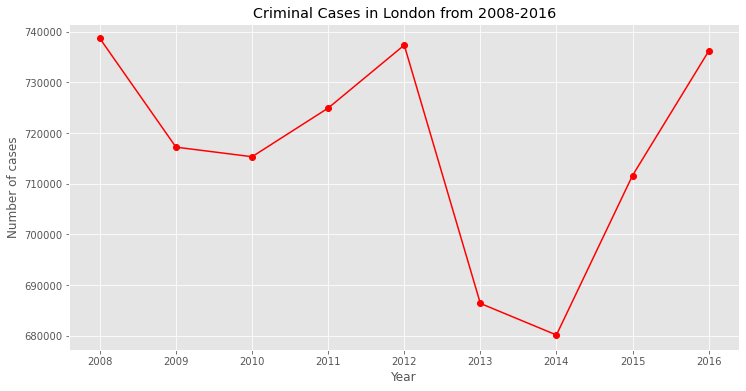

In [24]:
# get sum of value by year, and show as line plot
df_lon_crime2.groupby(by=['Year'])['Value'].sum().plot(figsize=(12,6), marker='o', color='red')

# set title and detail information
plt.title('Criminal Cases in London from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of cases')

In the graph above, the change in the number of cases in London from 2008 to 2016, experienced an increase and decrease in the number of cases, but there was a significant decrease from 2012 to 2013 about 50922 cases, and also experienced a significant increase from 2014 to 2016 about 55938 cases.